In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

pd.set_option('display.max_rows', 1000)

In [2]:
# Load the CSV files
df1 = pd.read_csv('96On_4.csv', names=['tier'])  # Reading the first file and naming the column 'tier'
df2 = pd.read_csv('pulltab_info.csv')  # Reading the second file

# Perform a left join of df1 on df2 based on the 'tier' column
df = pd.merge(df1, df2, on='tier', how='left')

# Display the first few rows of the resulting DataFrame
df

FileNotFoundError: [Errno 2] No such file or directory: '96On_4.csv'

In [ ]:
denom = 100

base_bet = 1.2

bet_multipliers = [25,50,100,150,200]

bets = [i*base_bet/denom for i in bet_multipliers]
print('Best Levels:',bets)

# Create a dictionary to map bets to their multipliers
bet_to_multiplier = dict(zip(bets, bet_multipliers))
print('Map bet to Multiplier:',bet_to_multiplier)

# selected_bet_multiplier = 25
# print('Selected Bet Multiplier:',selected_bet_multiplier)

# selected_bet = base_bet*selected_bet_multiplier/denom
# print('Selected Bet :$',selected_bet)

Best Levels: [0.3, 0.6, 1.2, 1.8, 2.4]
Map bet to Multiplier: {0.3: 25, 0.6: 50, 1.2: 100, 1.8: 150, 2.4: 200}


In [ ]:

def plot_metrics(simulation_df):
    # Identify indices where 'kind' is not 'bg'
    bonus_indices = simulation_df[simulation_df['kind'] != 'bg'].index

    # Plot setup
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # Three subplots in a vertical arrangement

    # Plot 'credit'
    axs[0].plot(simulation_df.index, simulation_df['credit'], label='Credit ($)', color='blue')
    axs[0].scatter(bonus_indices, simulation_df.loc[bonus_indices, 'credit'], color='black', label='Bonus')
    axs[0].set_title('Credit Over Time')
    axs[0].set_xlabel('Game Steps')
    axs[0].set_ylabel('Credit ($)')
    axs[0].legend()

    # Plot 'money_won'
    axs[1].plot(simulation_df.index, simulation_df['win'], label='Win ($)', color='green')
    axs[1].scatter(bonus_indices, simulation_df.loc[bonus_indices, 'win'], color='black', label='Bonus')
    axs[1].set_title('Win Over Time')
    axs[1].set_xlabel('Game Steps')
    axs[1].set_ylabel('Money Won ($)')
    axs[1].legend()

    # Plot 'RTP'
    axs[2].plot(simulation_df.index, simulation_df['rtp'], label='RTP (%)', color='red')
    axs[2].scatter(bonus_indices, simulation_df.loc[bonus_indices, 'rtp'], color='black', label='Bonus')
    axs[2].set_title('Return to Player (RTP) Over Time')
    axs[2].set_xlabel('Game Steps')
    axs[2].set_ylabel('RTP (%)')
    axs[2].legend()

    # Enhance layout spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

In [ ]:
def run_simulation(selected_bet,cash_in,cash_out):
    global start_index

    print('Credit: $',cash_in)
    print('Bet: $',selected_bet)

    # Randomly select a starting point in the DataFrame
#     start_index = np.random.randint(0, len(df))
#     start_index = 249990

    selected_bet_multiplier = bet_to_multiplier.get(selected_bet)
    print('Bet Multiplier:',selected_bet_multiplier)

    print('Current Start Index:',start_index)

    # Initialize the simulation DataFrame variables
    current_cash = cash_in
    total_money_in = 0
    total_money_won = 0

    # Lists for storing the simulation results
    tier = []
    credits = []
    wins = []
    money_in = []
    money_won = []
    rtps = []
    kind = []

    # Simulation of the game
    index = start_index
    while current_cash >= selected_bet and current_cash < cash_out:

        # Use modulo operator to wrap around if the index exceeds the DataFrame length
        if index == len(df):
            index = 0

        row = df.iloc[index]

        tier.append(row['tier'])

        current_cash -= selected_bet  # Subtract the bet from the current cash

        total_money_in += selected_bet

        win = row['pay'] * selected_bet_multiplier / denom  # Calculate the win based on the current bet

        total_money_won += win

        current_cash += win  # Add the winnings to the current cash

        # Update simulation data
        credits.append(current_cash)
        wins.append(win)
        money_in.append(total_money_in)
        money_won.append(total_money_won)

        rtp = total_money_won / total_money_in if total_money_in > 0 else 0
        rtps.append(rtp*100)

        kind.append(row['kind'])

        # Increment index for the next iteration
        index += 1

    # Updating the start index
    start_index = index

    # Create DataFrame from simulation data
    sim_df = pd.DataFrame({
        'tier':tier,
        'credit': credits,
        'win': wins,
        'money_in': money_in,
        'money_won': money_won,
        'rtp': rtps,
        'kind':kind
    })
    print('Next Start Index:',start_index)
    print('Maximum Win:', round(sim_df['win'].max()))
    print('Maximun Credit:', round(sim_df['credit'].max()))
    print('Number of Bonuses:', (sim_df['kind']=='fg').sum())
    plot_metrics(sim_df)
    return sim_df

### Available Bets:   [0.3, 0.6, 1.2, 1.8, 2.4]

In [ ]:
# Randomly select a starting point in the DataFrame
start_index = np.random.randint(0, len(df))

Credit: $ 10000
Bet: $ 1.8
Bet Multiplier: 150
Current Start Index: 190799
Next Start Index: 67350
Maximum Win: 1798
Maximun Credit: 10267
Number of Bonuses: 1570


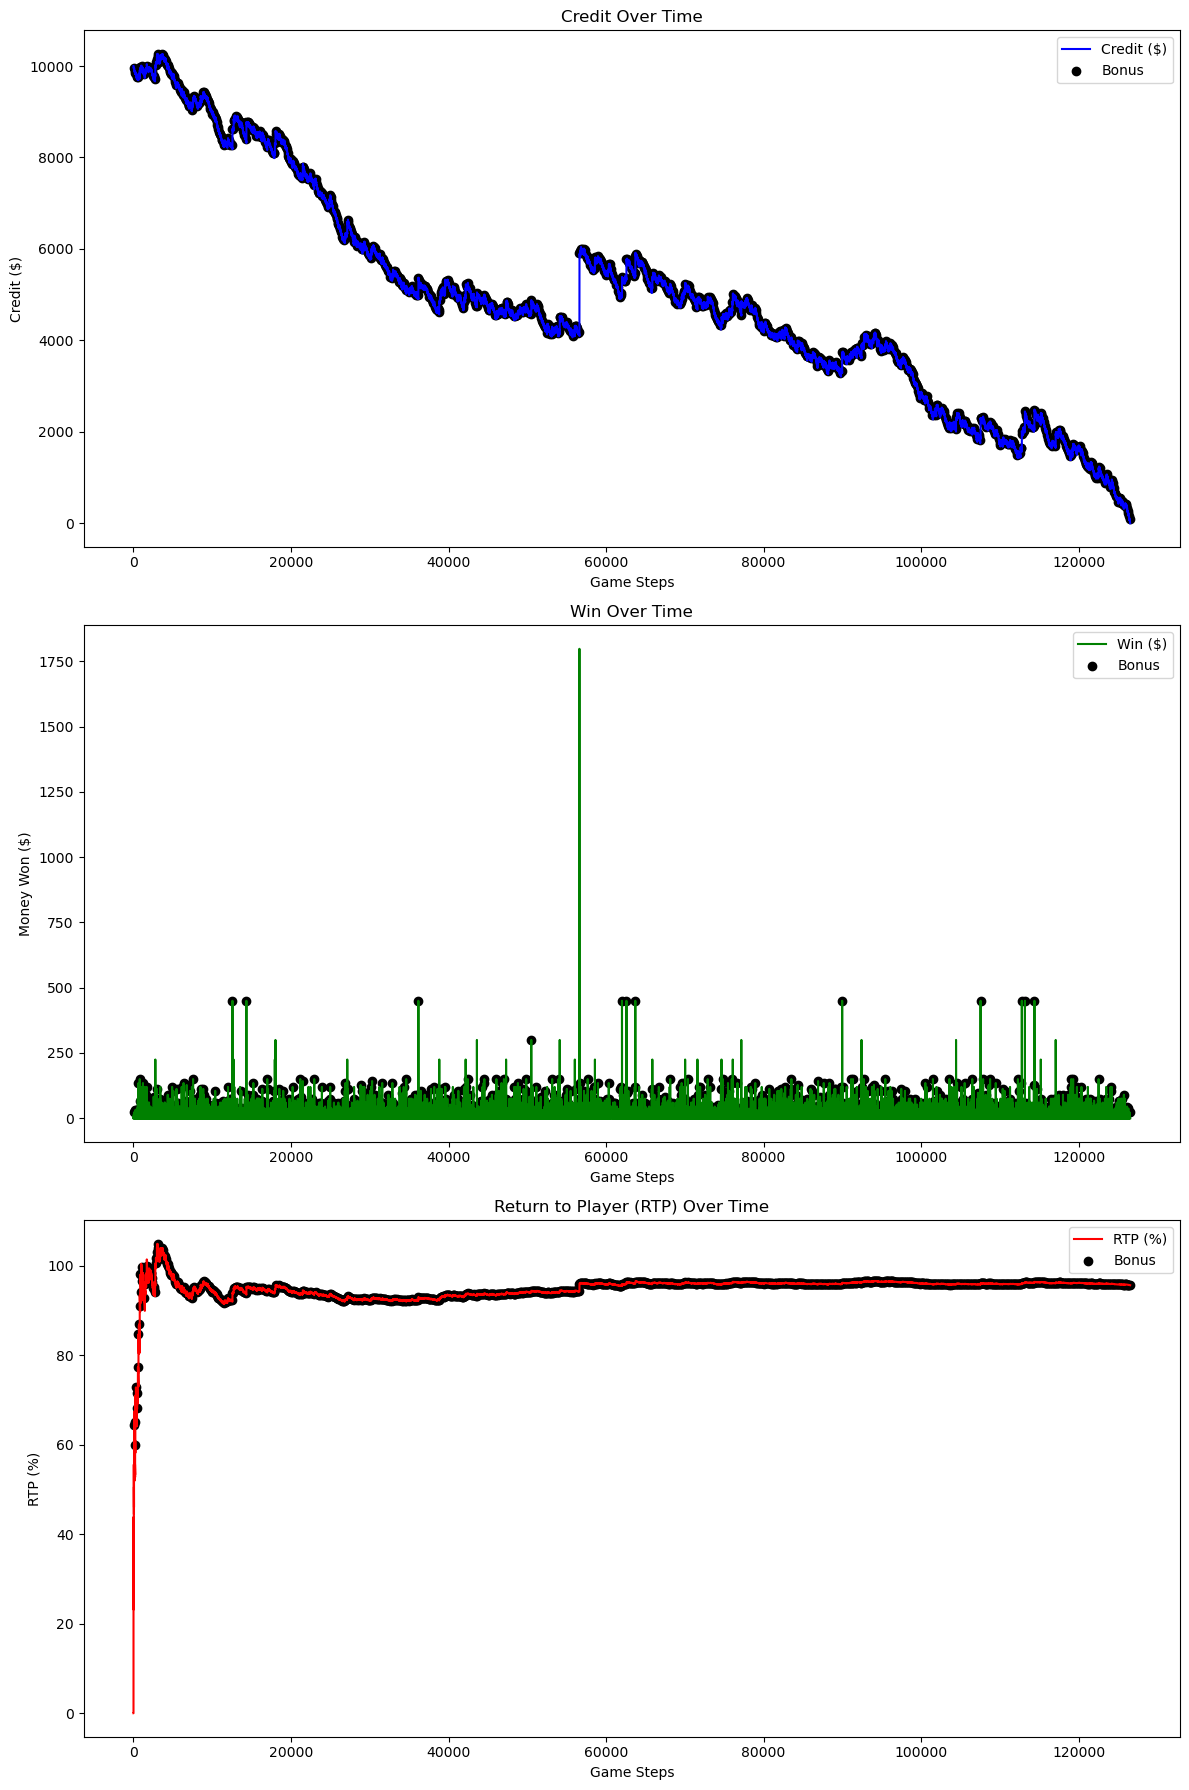

,tier,credit,win,money_in,money_won,rtp,kind
0,0,9998.2,0.0,1.8,0.0,0.000000,bg
1,0,9996.4,0.0,3.6,0.0,0.000000,bg
2,0,9994.6,0.0,5.4,0.0,0.000000,bg
3,26,9995.8,3.0,7.2,3.0,41.666667,bg
4,0,9994.0,0.0,9.0,3.0,33.333333,bg
...,...,...,...,...,...,...,...
126546,27,7.9,1.5,227784.6,217792.5,95.613356,bg
126547,0,6.1,0.0,227786.4,217792.5,95.612600,bg
126548,0,4.3,0.0,227788.2,217792.5,95.611845,bg
126549,0,2.5,0.0,227790.0,217792.5,95.611089,bg


In [ ]:
# Example usage:
simulation_df = run_simulation(selected_bet=1.8,cash_in=10000, cash_out=1000000000000)
simulation_df

In [ ]:
simulation_df['win'].max()

1798.5

In [ ]:
simulation_df[simulation_df['win']==1798.5]

,tier,credit,win,money_in,money_won,rtp,kind
56621,16,5893.9,1798.5,101919.6,97813.5,95.971236,bg


In [ ]:
df[df['tier']==20]

,tier,name,pay,weight,kind
64,20,T06,50.0,300.0,bg
1109,20,T06,50.0,300.0,bg
3730,20,T06,50.0,300.0,bg
4527,20,T06,50.0,300.0,bg
5083,20,T06,50.0,300.0,bg
5730,20,T06,50.0,300.0,bg
6635,20,T06,50.0,300.0,bg
6776,20,T06,50.0,300.0,bg
9866,20,T06,50.0,300.0,bg
10071,20,T06,50.0,300.0,bg


In [ ]:
x = 150972
df.iloc[x:x+200]

,tier,name,pay,weight,kind
150972,0,Lose,0.0,165984.0,bg
150973,26,T12,2.0,17000.0,bg
150974,12,Lose_T13,0.0,12000.0,bg
150975,0,Lose,0.0,165984.0,bg
150976,0,Lose,0.0,165984.0,bg
150977,0,Lose,0.0,165984.0,bg
150978,27,T13,1.0,23000.0,bg
150979,0,Lose,0.0,165984.0,bg
150980,0,Lose,0.0,165984.0,bg
150981,0,Lose,0.0,165984.0,bg
